# Stock Market Prediction And Forecasting Using Stacked LSTM

Author:- Riya sahu
TASK1


In [18]:
#importing all the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from matplotlib import style
plt.style.use('bmh')

In [23]:
style.use('ggplot')

In [29]:
#importing the dataset
df=pd.read_csv('NSE-TATAGLOBAL.csv')

In [30]:
#analysing the dataset
df.head(25)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [32]:
df.tail(5)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [33]:
df.isna().any()

Date                    False
Open                    False
High                    False
Low                     False
Last                    False
Close                   False
Total Trade Quantity    False
Turnover (Lacs)         False
dtype: bool

In [34]:
#checking whether there are any null values or not
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [36]:
#creating two variables for actual and prediction values
x = df[['High','Open','Low','Last']].values
y = df['Close'].values

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [40]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
y_pred = regressor.predict(x_test)
result = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})
result.head(25)

,Actual,Predicted
0,134.95,135.920574
1,145.35,145.837051
2,157.10,157.265928
3,152.15,152.014904
4,112.05,112.126555
5,156.95,157.539780
6,144.25,144.523201
7,163.60,163.600226
8,109.45,109.379148
9,141.00,140.914634


In [42]:
import math

In [43]:
graph =result.head(20)

<AxesSubplot:>

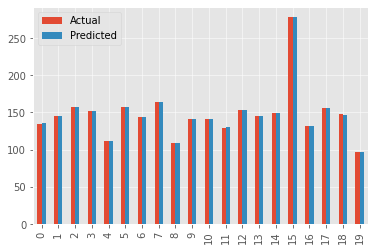

In [44]:
graph.plot(kind='bar')

In [45]:
df.shape #get the number of trading days

(2035, 8)

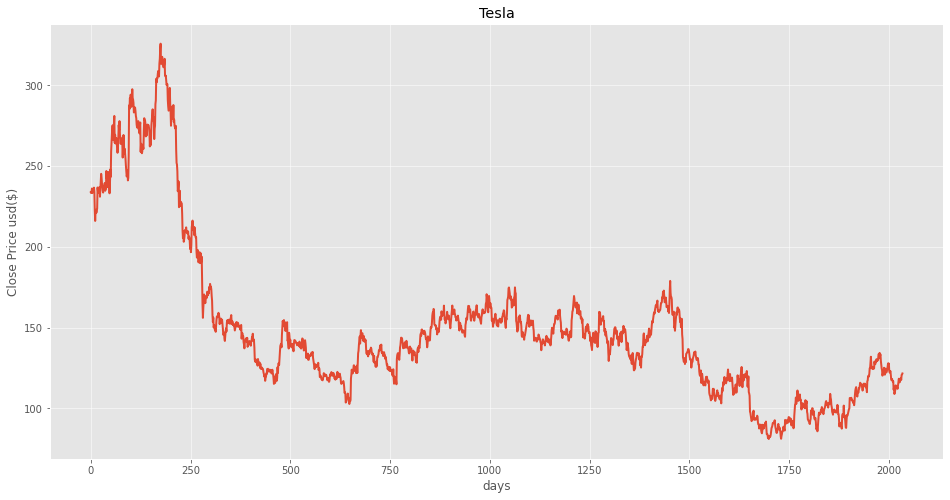

In [46]:
#visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Tesla')
plt.xlabel('days')
plt.ylabel('Close Price usd($)')
plt.plot(df['Close'])
plt.show()

In [47]:
#get the close price
df=df[['Close']]
df.head(4)

,Close
0,233.75
1,233.25
2,234.25
3,236.10


In [48]:
#create a variable to predict 'x' days out into the future
future_days=25
df['Prediction']=df[['Close']].shift(-future_days)
df.tail(4)

,Close,Prediction
2031,117.60,NaN
2032,120.65,NaN
2033,120.90,NaN
2034,121.55,NaN


In [49]:
#create the feature data set (x) and convert it to a numpy array and remove the last 'x' rows/days
X=np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[233.75]
 [233.25]
 [234.25]
 ...
 [117.75]
 [118.15]
 [117.  ]]


/home/riya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [50]:
#create the target data set (y) and convert it to a numpy array and get all the target values except the last 'x'rows/days
y=np.array(df['Prediction'])[:-future_days]
print(y)

[240.55 245.15 243.   ... 120.65 120.9  121.55]


In [51]:
#split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test=train_test_split(X,y, test_size=0.20)

In [53]:
#get the last 'x' rows of the feature data set
x_future=df.drop(['Prediction'],1)[:-future_days]
x_future=x_future.tail(future_days)
x_future=np.array(x_future)
x_future

/home/riya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


array([[121.5 ],
       [122.85],
       [123.6 ],
       [125.1 ],
       [123.55],
       [120.8 ],
       [122.5 ],
       [124.55],
       [122.65],
       [122.15],
       [123.25],
       [123.9 ],
       [125.95],
       [127.8 ],
       [127.25],
       [127.7 ],
       [123.15],
       [122.15],
       [122.4 ],
       [123.  ],
       [120.5 ],
       [117.6 ],
       [117.75],
       [118.15],
       [117.  ]])

In [59]:
#create the modules
#create the decision tree regression prediction
lr = LinearRegression().fit(x_train, y_train)

In [60]:
#show the models linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[122.03072498 123.28687654 123.98473852 125.38046248 123.93821439
 121.37938714 122.96120762 124.86869703 123.10078001 122.6355387
 123.6590696  124.26388331 126.17137272 127.8927656  127.38100015
 127.79971733 123.56602133 122.6355387  122.86815936 123.42644894
 121.10024234 118.4018427  118.54141509 118.91360815 117.84355311]


/home/riya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


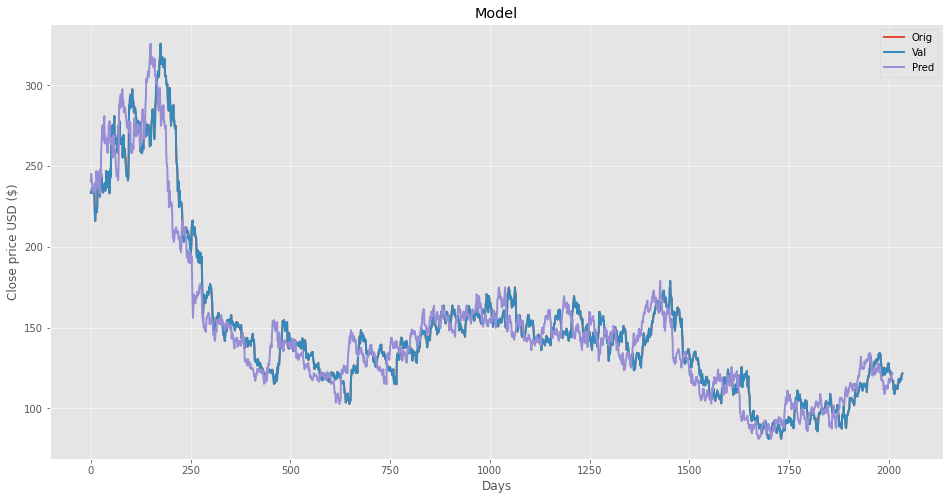

In [61]:
#visualize the data
prediction = lr_prediction

valid=df[x.shape[0]:]
valid['Prediction']= prediction
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price USD ($)')
plt.plot(df['Close'])
plt.plot(df[['Close', 'Prediction']])
plt.legend(['Orig' , 'Val' , 'Pred'])
plt.show()